<div style="width:100%; height:60px; background-color:aqua; display:flex">
<div style="display:flex; flex-direction:row; justify-content:center">
<h2 style="color:white"><strong>K Fold Cross Validation</strong></h2>
</div>
</div>

<h3 style="color:white">K-Fold Cross-Validation is a robust technique used to evaluate the performance of machine learning models. It helps ensure that the model generalizes well to unseen data by using different portions of the dataset for training and testing in multiple iterations. </h3>

<h2 style="color:aqua;font-style:italic;font-weight:bold">K-Fold Cross-Validation vs. Train-Test Split
<h5 style="color:white">
<p>While K-Fold Cross-Validation partitions the dataset into multiple subsets to iteratively train and test the model, the Train-Test Split method divides the dataset into just two parts: one for training and the other for testing. The Train-Test Split method is simple and quick to implement, but the performance estimate can be highly dependent on the specific split, leading to high variance in the results.</p>

<p>The images below illustrate the structural differences between these two methods. The first image shows the Train-Test Split method, where the dataset is divided into 80% training and 20% testing segments.</p>

<p>The second image depicts a 5-Fold Cross-Validation, where the dataset is split into five parts, with each part serving as a test set in one of the five iterations, ensuring each segment is used for both training and testing.</p>

<p>We can see that K-Fold Cross-Validation provides a more robust and reliable performance estimate because it reduces the impact of data variability. By using multiple training and testing cycles, it minimizes the risk of overfitting to a particular data split. This method also ensures that every data point is used for both training and validation, which results in a more comprehensive evaluation of the model's performance.</p> 
</h5>
</h2>

<div style="width:100%; height:auto; display:flex; flex-direction:row; justify-content:space-around;">
<img style="width:40%;height:auto; background-color:white" src="/home/ahmedunix/data_Science_Work/Machine_Learning/13_K_Fold_Cross_Validation/k_fold_1.jpg">
<img style="width:40%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/13_K_Fold_Cross_Validation/k_fold_2.jpg">
</div>

<div style="width:100%; height:auto; display:flex; flex-direction:row; justify-content:space-around;">
<img style="width:35%;height:auto;background-color:white" src="/home/ahmedunix/data_Science_Work/Machine_Learning/13_K_Fold_Cross_Validation/grid_search_cross_validation.png">
<img style="width:55%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/13_K_Fold_Cross_Validation/K-fold cross vaslidation.png">
</div>

In [40]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf, keras
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [5]:
digits.feature_names[:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [6]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [7]:
digits.target_names[:5]

array([0, 1, 2, 3, 4])

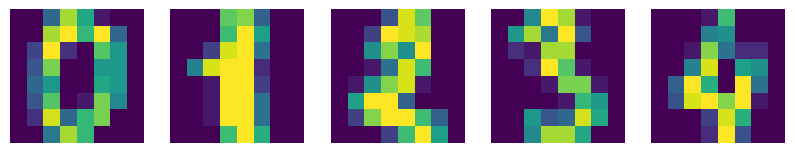

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))  # Create a row of 5 subplots

for i in range(5):
    axes[i].imshow(digits.images[i])  # Plot each image in a separate subplot
    axes[i].axis('off')  # Turn off the axis for a cleaner look

plt.show()  # Show all 

In [9]:
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

In [10]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
df['target'] = digits.target

In [12]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [13]:
x = df.drop(columns=['target'])

In [15]:
y = df.target

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [21]:
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [28]:
y_predicted_lr = model_lr.predict(x_test)
accuracy_score(y_true=y_test,y_pred=y_predicted_lr)

0.9574074074074074

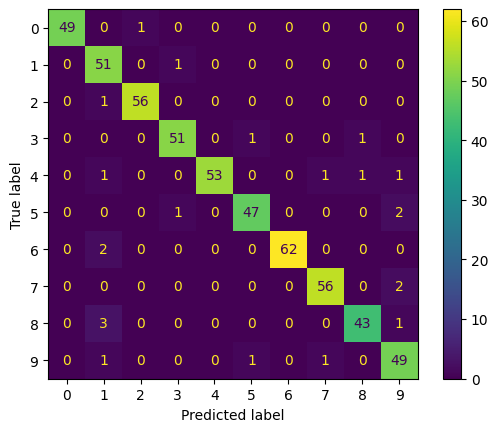

In [29]:
cm = confusion_matrix(y_true=y_test,y_pred=y_predicted_lr)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [27]:
model_svm = SVC()
model_svm.fit(x_train,y_train)

SVC()

In [31]:
y_predicted_svm = model_svm.predict(x_test)
accuracy_score(y_true=y_test,y_pred=y_predicted_svm)

0.9796296296296296

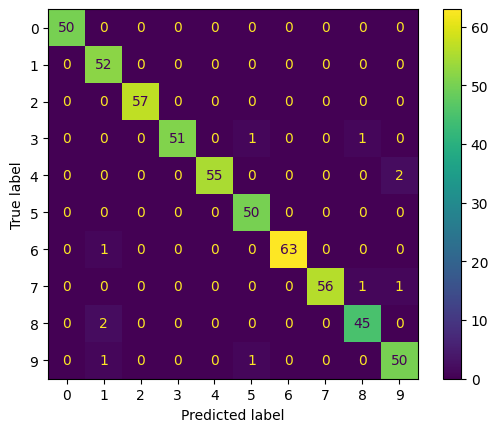

In [32]:
cm = confusion_matrix(y_true=y_test,y_pred=y_predicted_svm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [34]:
model_rf = RandomForestClassifier(n_estimators=120)
model_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=120)

In [36]:
y_predicted_rf = model_rf.predict(x_test)
accuracy_score(y_true=y_test,y_pred=y_predicted_rf)

0.9740740740740741

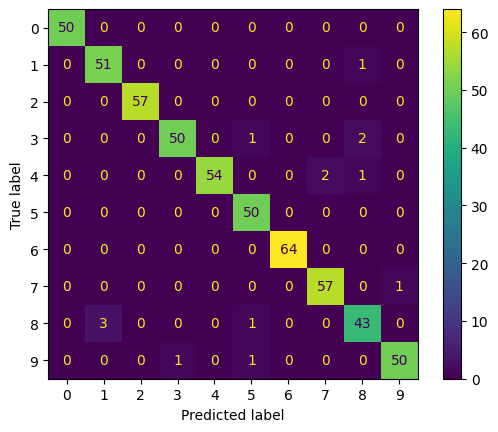

In [39]:
cm = confusion_matrix(y_true=y_test,y_pred=y_predicted_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [42]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)